In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 60,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 20

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
particle_list = [1500, 2000]

In [7]:
import time

Epoch 51. Training MSE: 0.317, Test MSE: 0.446.
Epoch 52. Training MSE: 0.316, Test MSE: 0.446.
Epoch 53. Training MSE: 0.315, Test MSE: 0.446.
Epoch 54. Training MSE: 0.315, Test MSE: 0.446.
Epoch 55. Training MSE: 0.314, Test MSE: 0.447.
Epoch 56. Training MSE: 0.313, Test MSE: 0.447.
Epoch 57. Training MSE: 0.312, Test MSE: 0.447.
Epoch 58. Training MSE: 0.311, Test MSE: 0.448.
Epoch 59. Training MSE: 0.311, Test MSE: 0.447.
Epoch 60. Training MSE: 0.31, Test MSE: 0.446.
Calculation time for 1000 particles: 78.7735861937205 minutes.


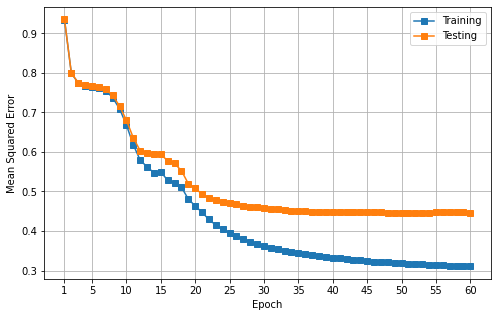

Epoch 51. Training MSE: 0.304, Test MSE: 0.467.
Epoch 52. Training MSE: 0.301, Test MSE: 0.469.
Epoch 53. Training MSE: 0.297, Test MSE: 0.472.
Epoch 54. Training MSE: 0.294, Test MSE: 0.473.
Epoch 55. Training MSE: 0.291, Test MSE: 0.473.
Epoch 56. Training MSE: 0.288, Test MSE: 0.474.
Epoch 57. Training MSE: 0.285, Test MSE: 0.476.
Epoch 58. Training MSE: 0.283, Test MSE: 0.477.
Epoch 59. Training MSE: 0.28, Test MSE: 0.479.
Epoch 60. Training MSE: 0.278, Test MSE: 0.481.
Calculation time for 1500 particles: 127.777914194266 minutes.


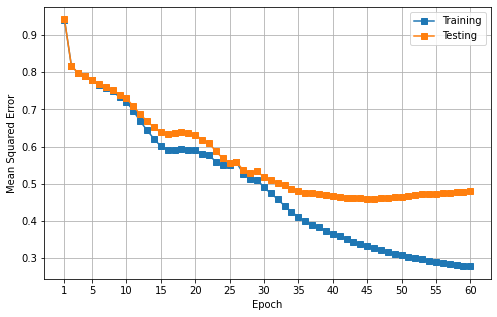

Epoch 51. Training MSE: 0.317, Test MSE: 0.462.
Epoch 52. Training MSE: 0.311, Test MSE: 0.46.
Epoch 53. Training MSE: 0.305, Test MSE: 0.46.
Epoch 54. Training MSE: 0.3, Test MSE: 0.461.
Epoch 55. Training MSE: 0.295, Test MSE: 0.461.
Epoch 56. Training MSE: 0.291, Test MSE: 0.463.
Epoch 57. Training MSE: 0.287, Test MSE: 0.464.
Epoch 58. Training MSE: 0.284, Test MSE: 0.465.
Epoch 59. Training MSE: 0.281, Test MSE: 0.466.
Epoch 60. Training MSE: 0.277, Test MSE: 0.467.
Calculation time for 2000 particles: 182.57306415637333 minutes.


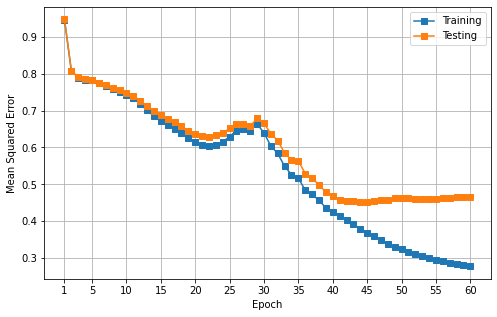

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))